In [1]:
import os
from pyprojroot.here import here
from tqdm.auto import trange, tqdm

import pandas as pd
import anndata as ad
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

import seaborn as sns

import sparse

import pickle

from collections import defaultdict

import re

In [2]:
CELL_TYPES=["Mono", "T_CD4_Naive", "T_CD4_NonNaive", "T_CD8_Naive", "T_CD8_NonNaive", "B", "Plasma", "UTC", "ILC", "pDC", "DC"]

CELL_TYPE = 'Mono'

adata = ad.read_h5ad(here(f'03_downstream_analysis/05_SHAP/data/{CELL_TYPE}_adataMerged_SPECTRAgenes.log1p.h5ad'), backed = 'r')
genes = adata.var_names
disease = adata.obs.disease.cat.categories

N_GENES = len(genes)
N_DISEASES = len(disease)

annot = (pd.DataFrame(adata.var_names)
.merge(
    pd.read_pickle(here("03_downstream_analysis/04_selected_gene_list.pkl")), 
    left_on='ensembl_gene_id', 
    right_index=True))

In [3]:
def load_shap_statistics(
    cell_type: str = '',
    interactions: bool = False, 
    run_name: str = 'run1'):

    if interactions:
        shap_type = 'shap_int'
    else:
        shap_type = 'shap'

    dirpath = here(f"03_downstream_analysis/05_SHAP/results/04_shap/{shap_type}_vals")
    fname_regex = f'{run_name}_{cell_type}_{shap_type}_values_stats_' + r'(\d+)'
    results_batches = [
        (fname, int(re.search(fname_regex, fname).group(1)))
        for fname in os.listdir(dirpath)
        if re.search(fname_regex, fname)]

    largest_batch_fname = max(results_batches, key=lambda x: x[1])

    print(f"Loading statistics computed on {(largest_batch_fname[1]+1) * 10000} samples.")

    largest_batch_fname = largest_batch_fname[0]

    shap_stats = np.load(os.path.join(dirpath, largest_batch_fname))

    return (
        shap_stats['mean_raw'],
        shap_stats['var_raw'],
        shap_stats['mean_abs'],
        shap_stats['var_abs'])

In [4]:
shap_ratio_of_int = {}

for cell_type in CELL_TYPES:
    print(cell_type)

    mean_raw, var_raw, mean_abs, var_abs = load_shap_statistics(cell_type, interactions=True)
    shap_ratio_list = []
    for j in trange(0, len(disease), leave=False):
        print(j)
        shap_colsum = np.sum(mean_abs[:, :, j], axis =0)
        print(shap_colsum.shape)
        shap_diag = np.diag(mean_abs[:, :, j])
        print(shap_diag.shape)
        shap_ratio = (shap_colsum - shap_diag) / shap_colsum
        print(shap_ratio.shape)
        shap_ratio_list.append(shap_ratio)
    
    shap_ratio_disease = np.stack(shap_ratio_list)
    print(shap_ratio_disease.shape)
    
    shap_ratio_of_int[cell_type] = shap_ratio_disease

Mono
Loading statistics computed on 1040000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
T_CD4_Naive


/var/tmp/ipykernel_48921/3803782471.py:14: RuntimeWarning: invalid value encountered in divide
  shap_ratio = (shap_colsum - shap_diag) / shap_colsum


Loading statistics computed on 790000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
T_CD4_NonNaive
Loading statistics computed on 710000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
T_CD8_Naive
Loading statistics computed on 210000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
T_CD8_NonNaive
Loading statistics computed on 520000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
B
Loading statistics computed on 350000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
Plasma
Loading statistics computed on 20000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
UTC
Loading statistics computed on 110000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
ILC
Loading statistics computed on 370000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
pDC
Loading statistics computed on 20000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)
DC
Loading statistics computed on 40000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

0
(935,)
(935,)
(935,)
1
(935,)
(935,)
(935,)
2
(935,)
(935,)
(935,)
3
(935,)
(935,)
(935,)
4
(935,)
(935,)
(935,)
5
(935,)
(935,)
(935,)
6
(935,)
(935,)
(935,)
7
(935,)
(935,)
(935,)
8
(935,)
(935,)
(935,)
9
(935,)
(935,)
(935,)
10
(935,)
(935,)
(935,)
11
(935,)
(935,)
(935,)
12
(935,)
(935,)
(935,)
13
(935,)
(935,)
(935,)
14
(935,)
(935,)
(935,)
15
(935,)
(935,)
(935,)
16
(935,)
(935,)
(935,)
17
(935,)
(935,)
(935,)
18
(935,)
(935,)
(935,)
19
(935,)
(935,)
(935,)
(20, 935)


(18700, 3)


/var/tmp/ipykernel_48921/2122653715.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


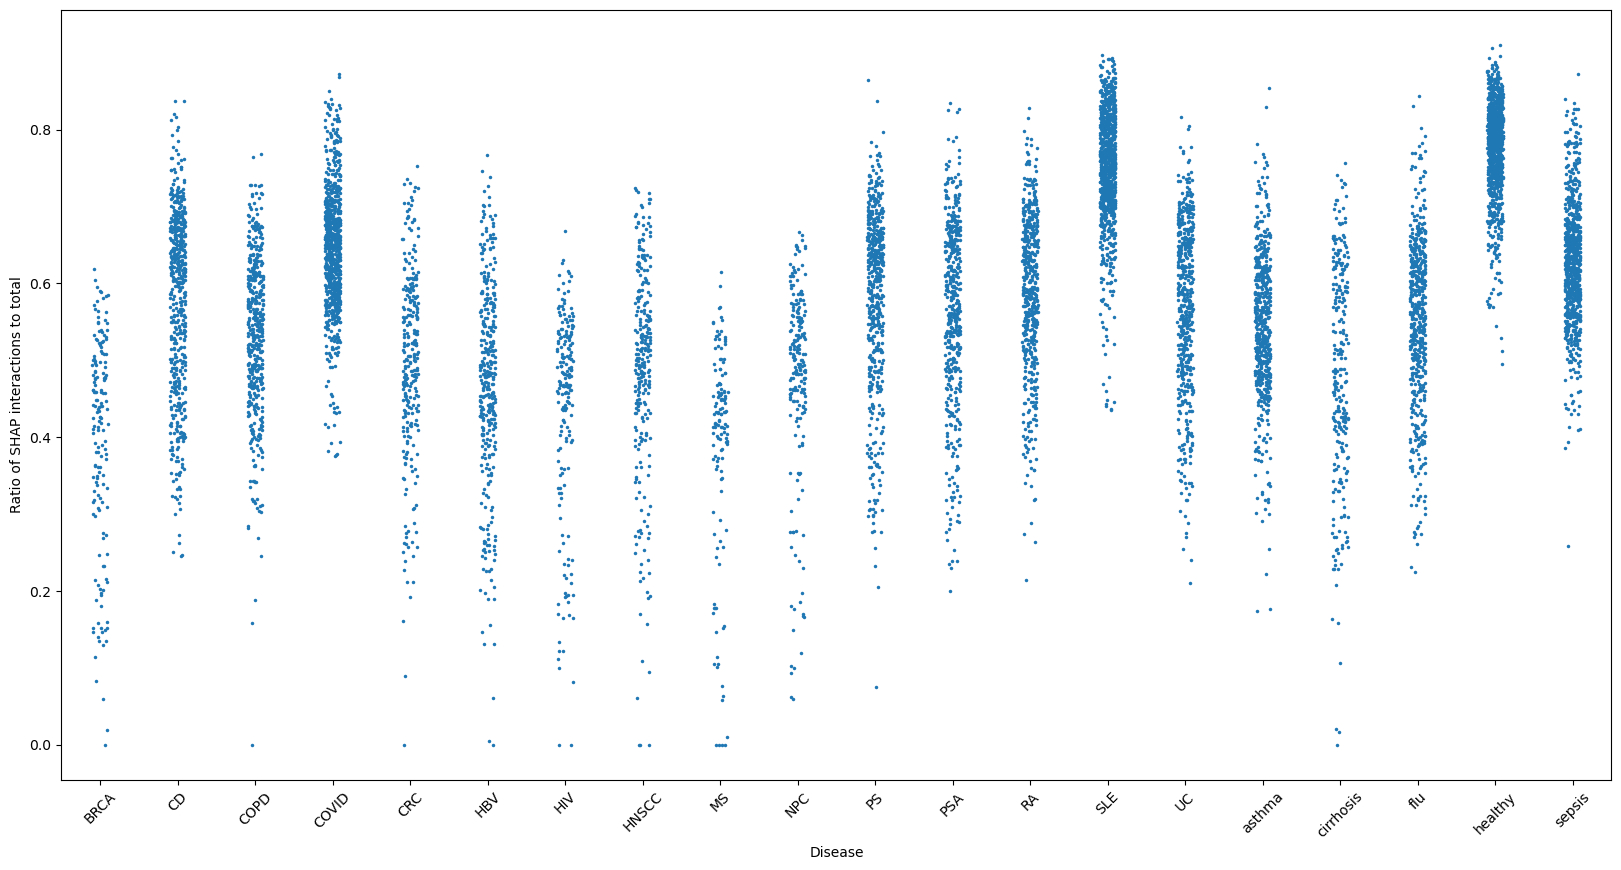

In [13]:
tmp = shap_ratio_of_int['ILC']
# plt.hist(tmp)
tmp.shape # 20, 935
tmp = shap_ratio_of_int[cell_type]
df = pd.DataFrame(tmp)
df_long = df.melt(var_name='Gene', value_name='SHAP', ignore_index=False)
df_long.reset_index(inplace=True)
df_long.rename(columns={'index': 'Disease'}, inplace=True)
print(df_long.shape)

plt.figure(figsize=(20, 10))
g = sns.stripplot(x='Disease', y= 'SHAP',  data=df_long, jitter=True, size=2.5)
plt.xlabel('Disease')
plt.ylabel('Ratio of SHAP interactions to total')
g.set_xticklabels(disease)
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.savefig(here(f'03_downstream_analysis/05_SHAP/results/04_shap/shap_statistics_full/jitterplot_{cell_type}_int_SHAP_ratio.png'), bbox_inches='tight')
plt.show()

In [10]:
df_long

,Disease,Gene,SHAP
0,0,0,0.341202
1,1,0,0.677817
2,2,0,NaN
3,3,0,0.790992
4,4,0,NaN
...,...,...,...
18695,15,934,0.529027
18696,16,934,NaN
18697,17,934,0.557469
18698,18,934,0.825369


Mono
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


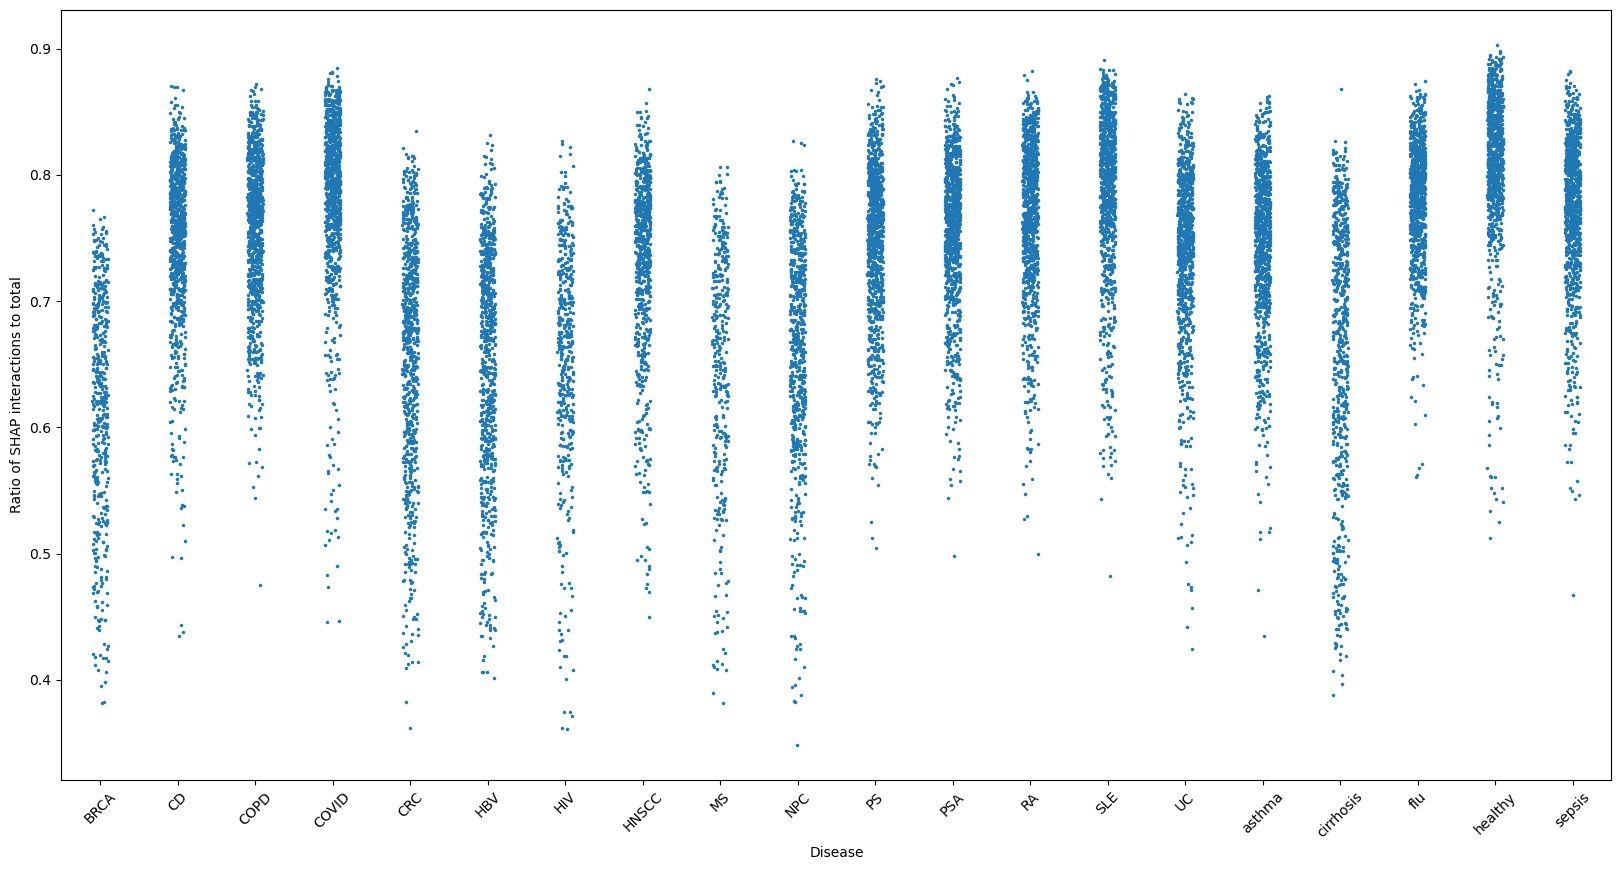

T_CD4_Naive
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


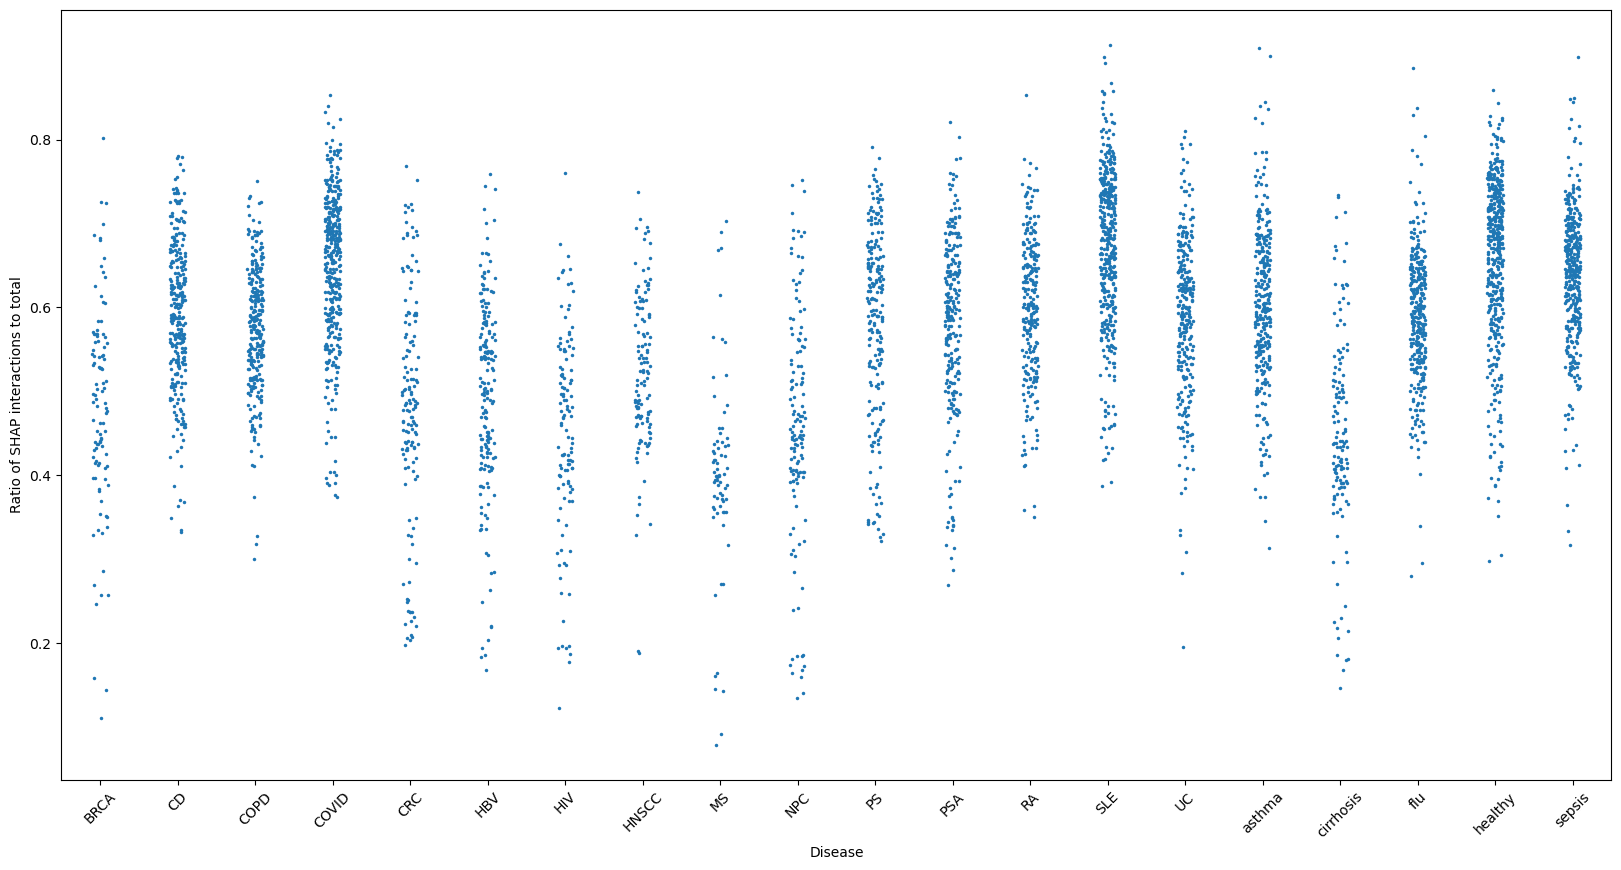

T_CD4_NonNaive
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


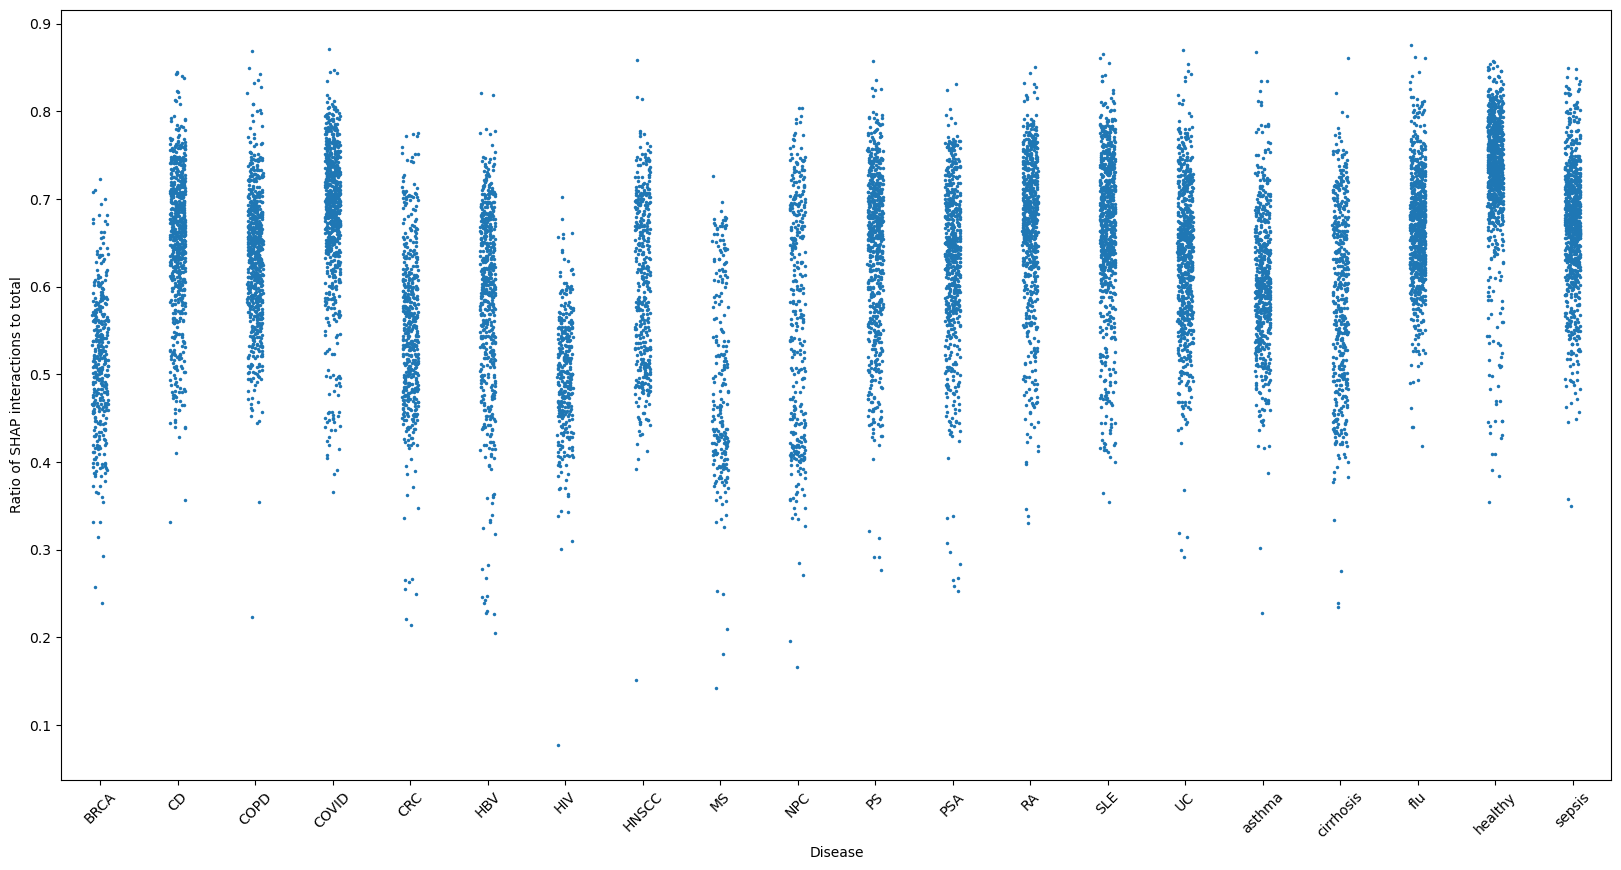

T_CD8_Naive
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


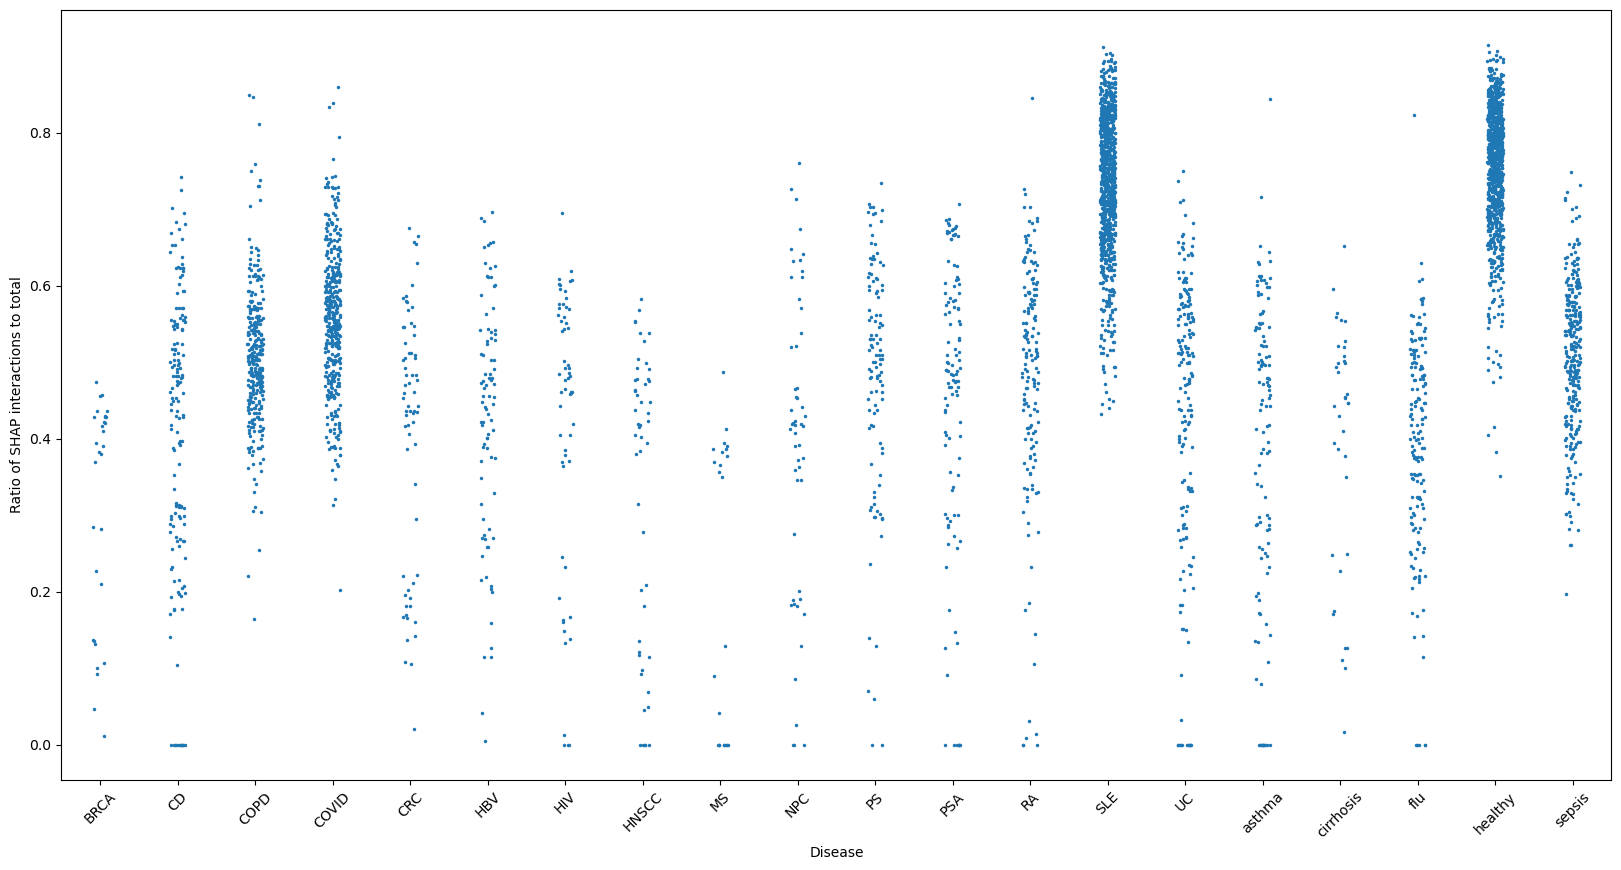

T_CD8_NonNaive
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


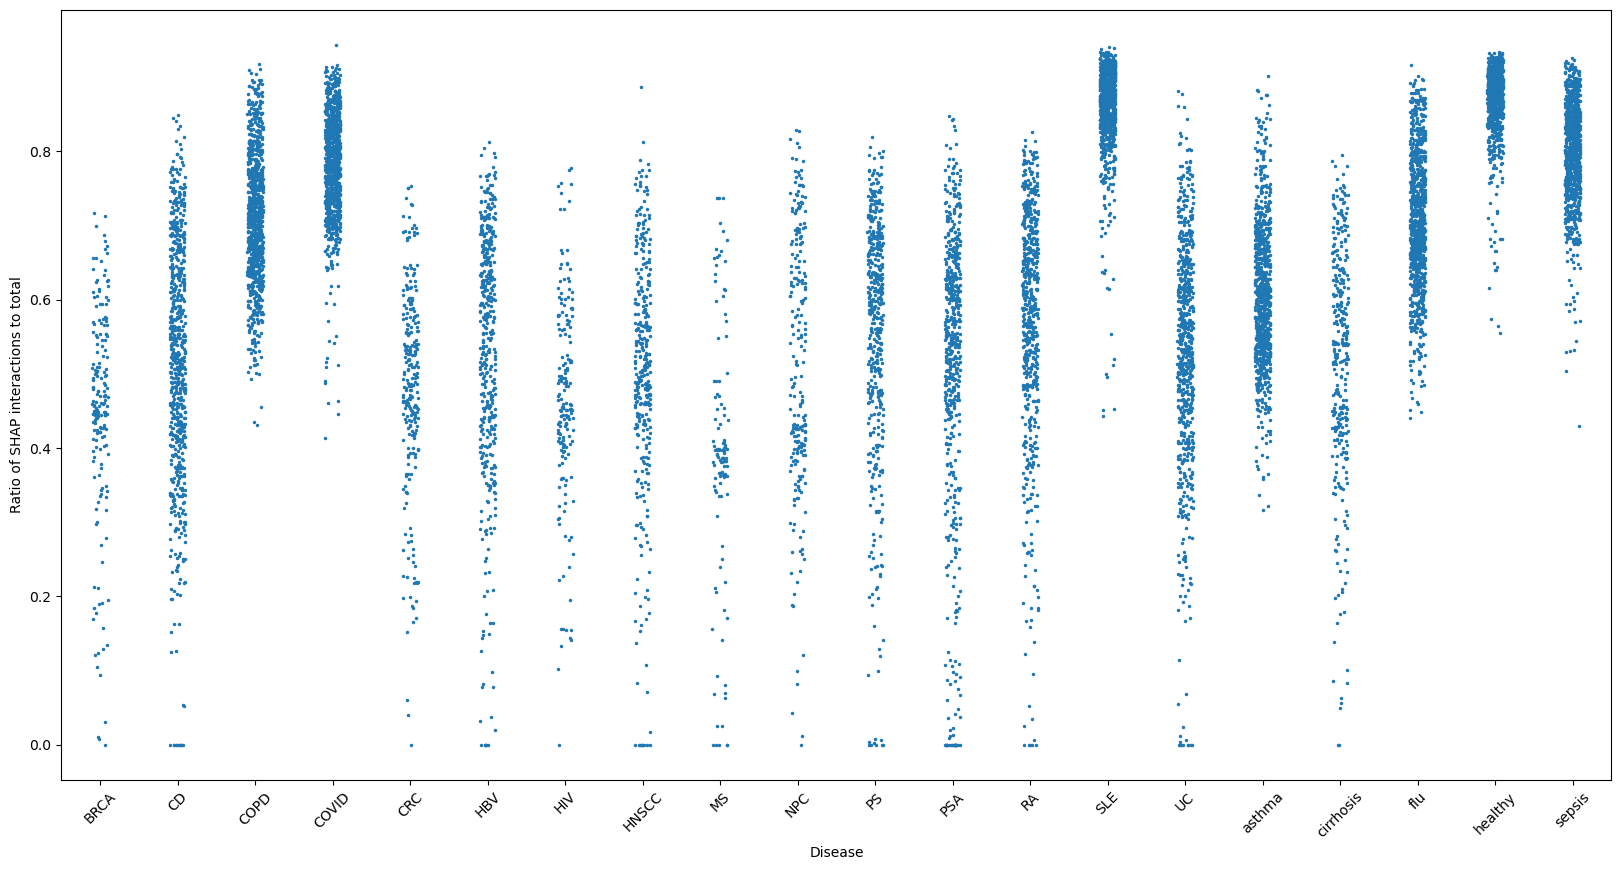

B
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


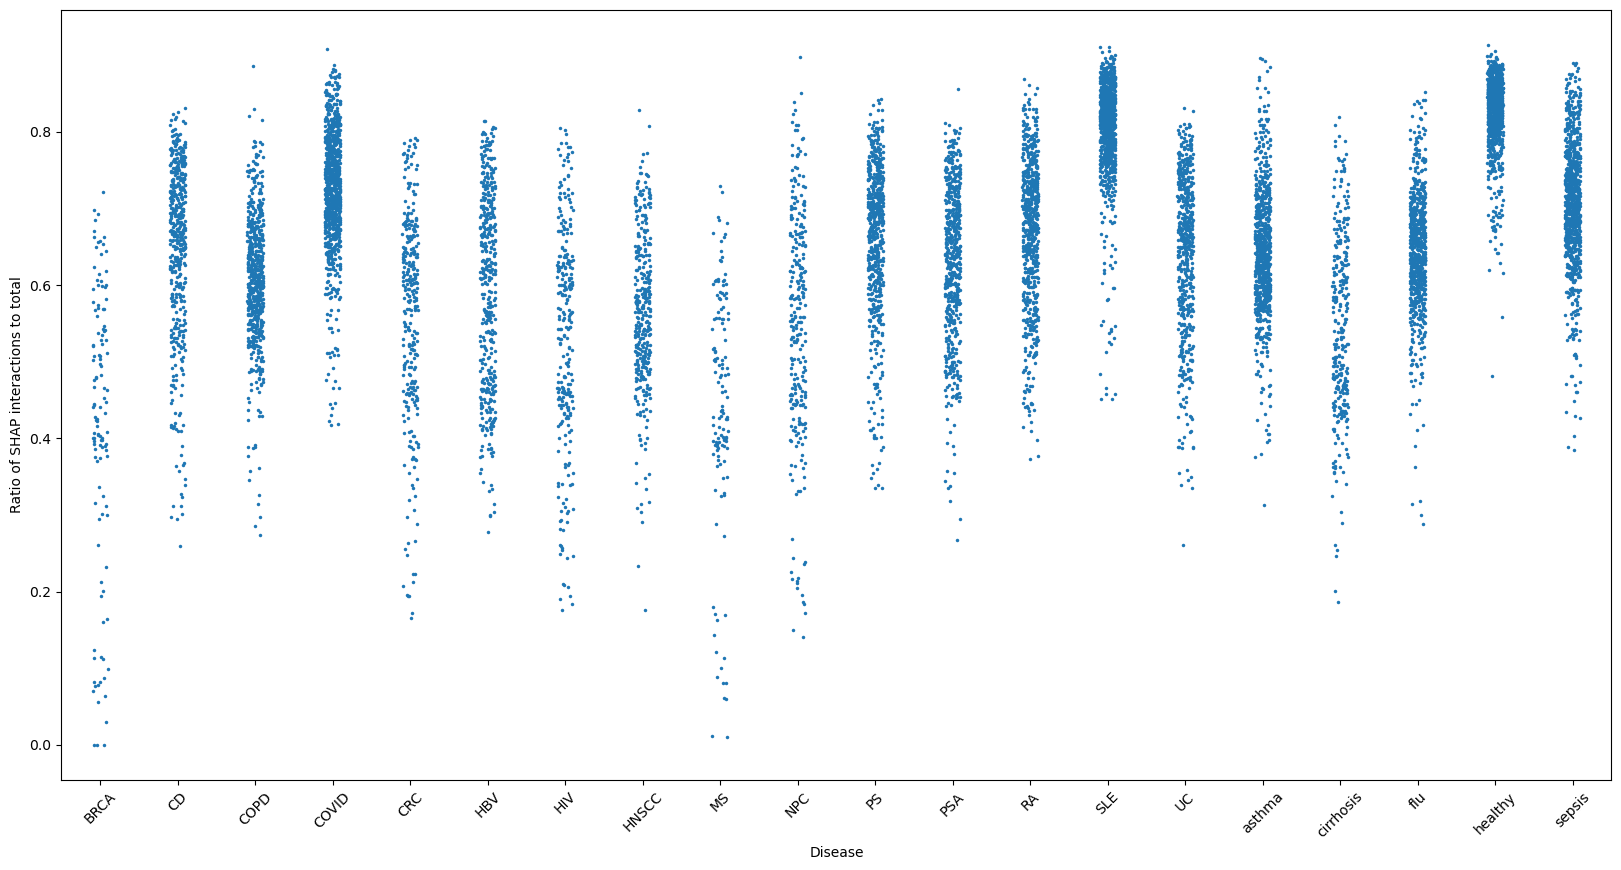

Plasma
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


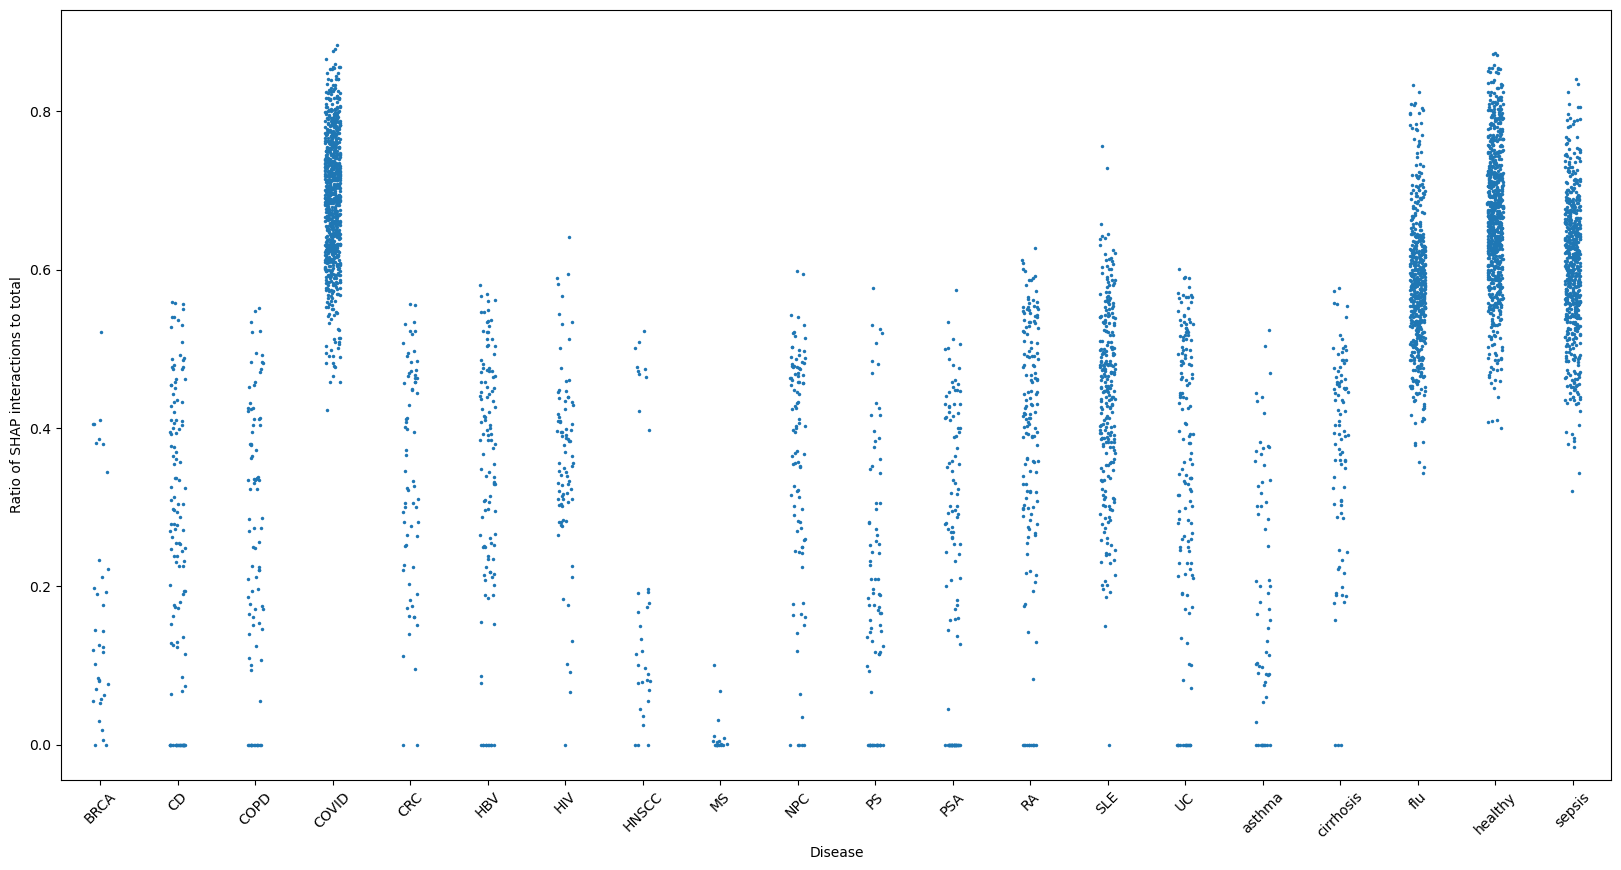

UTC
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


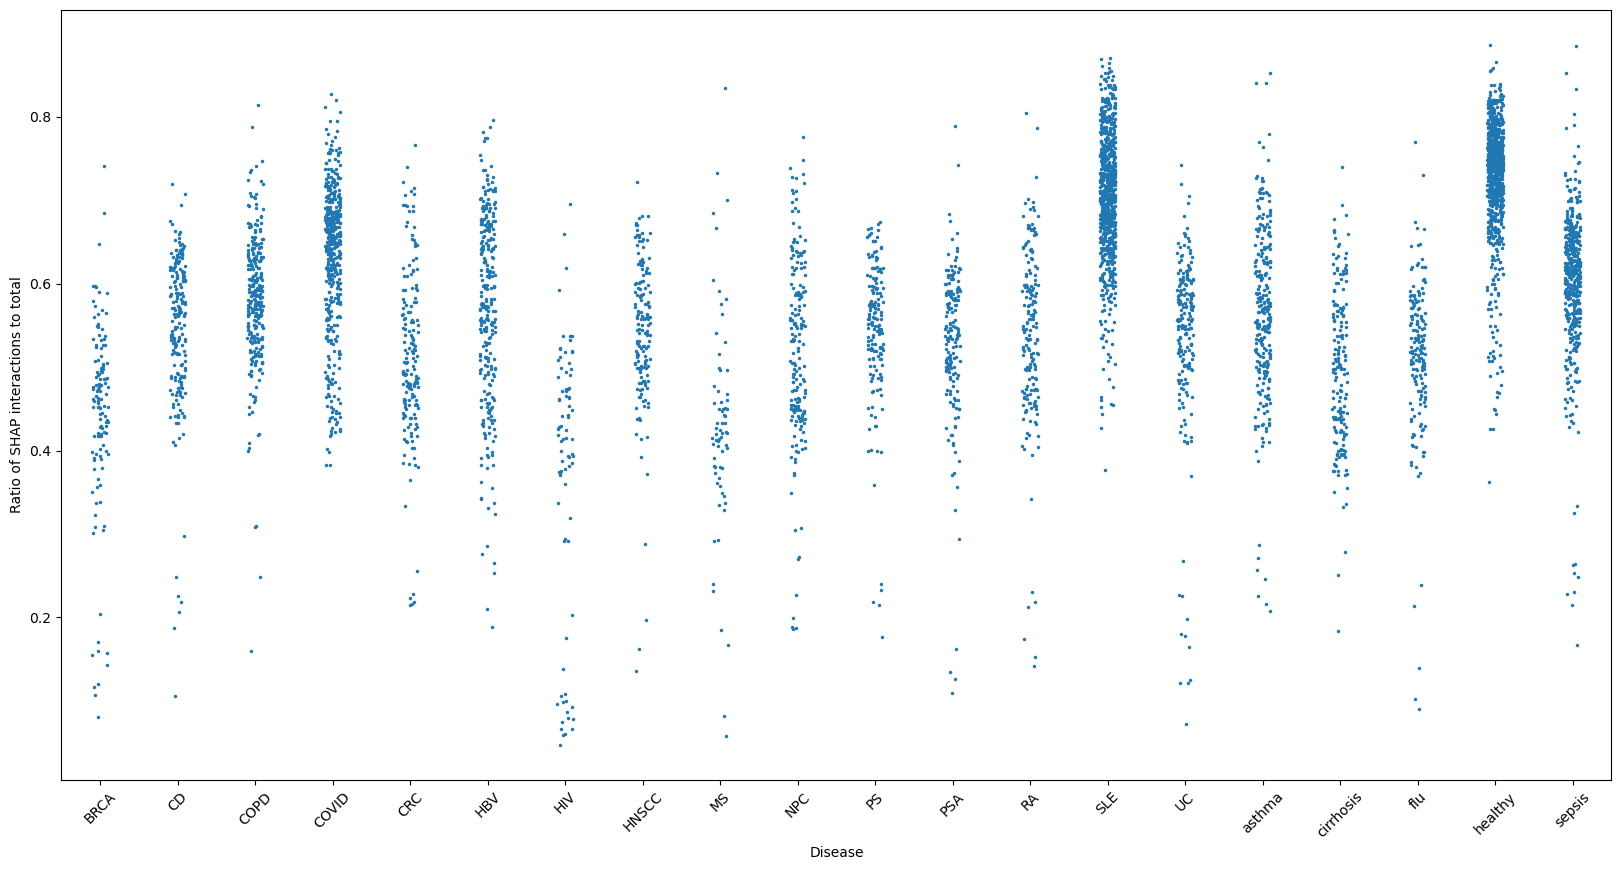

ILC
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


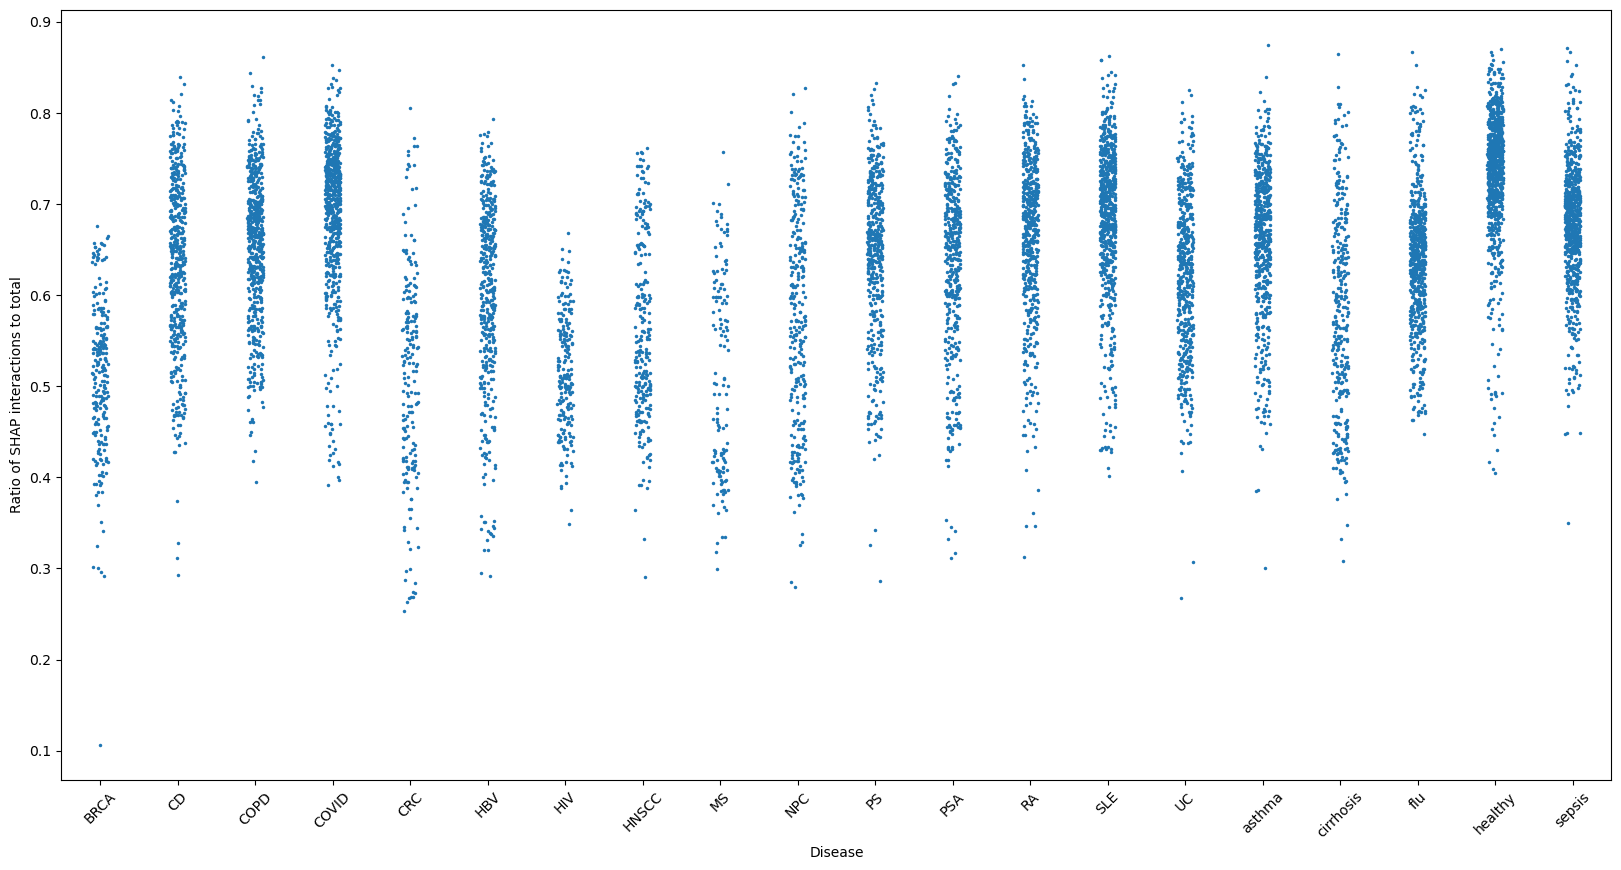

pDC
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


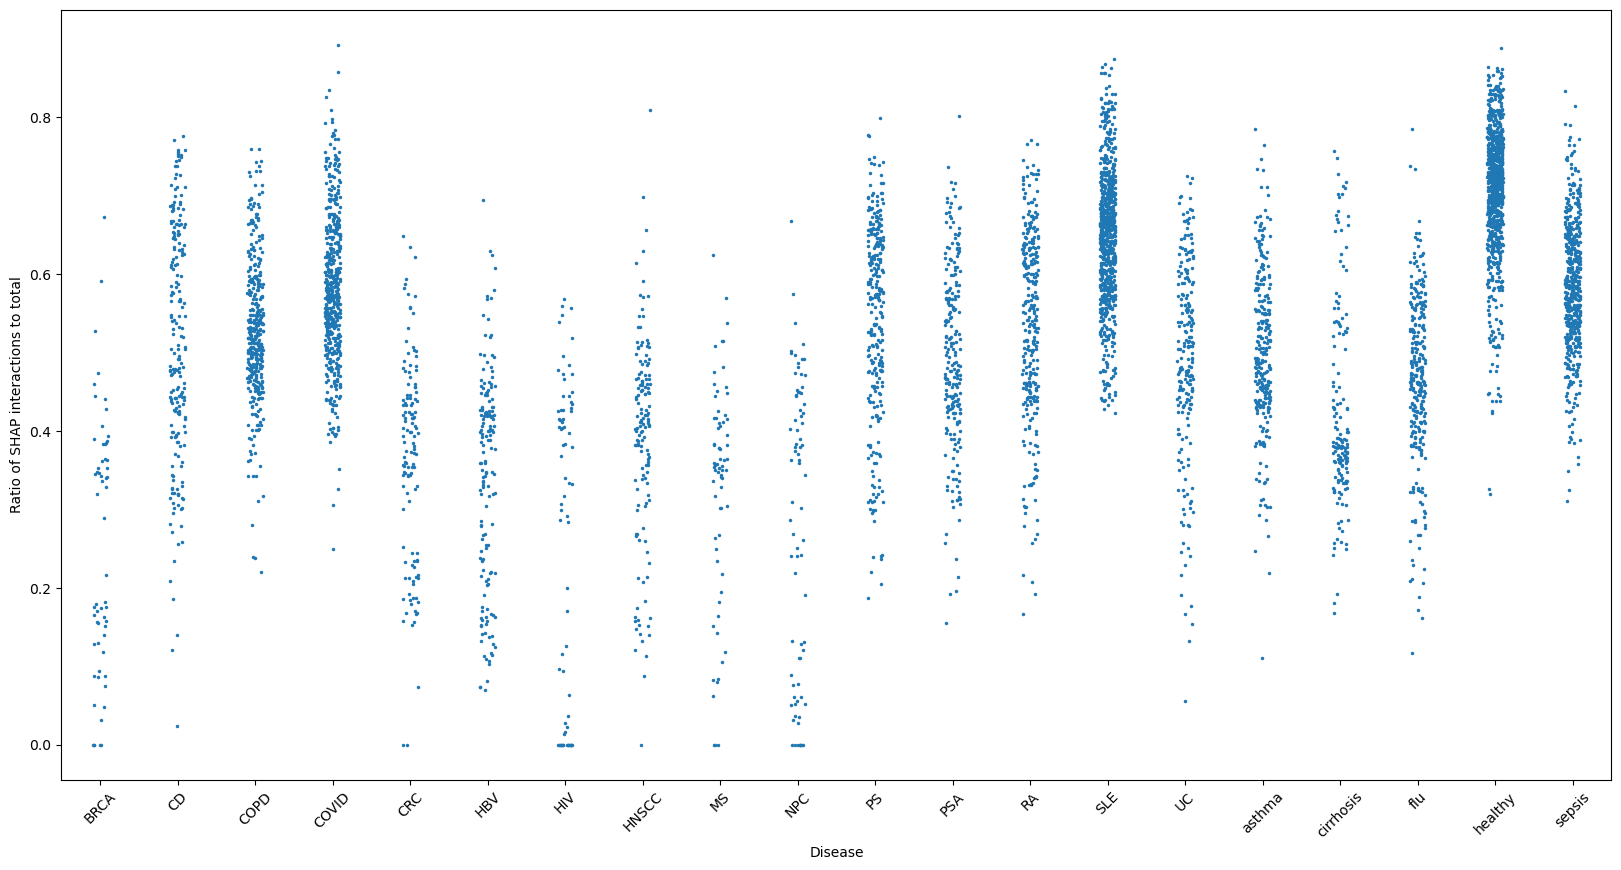

DC
(18700, 3)


/var/tmp/ipykernel_48921/3600799714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(disease)


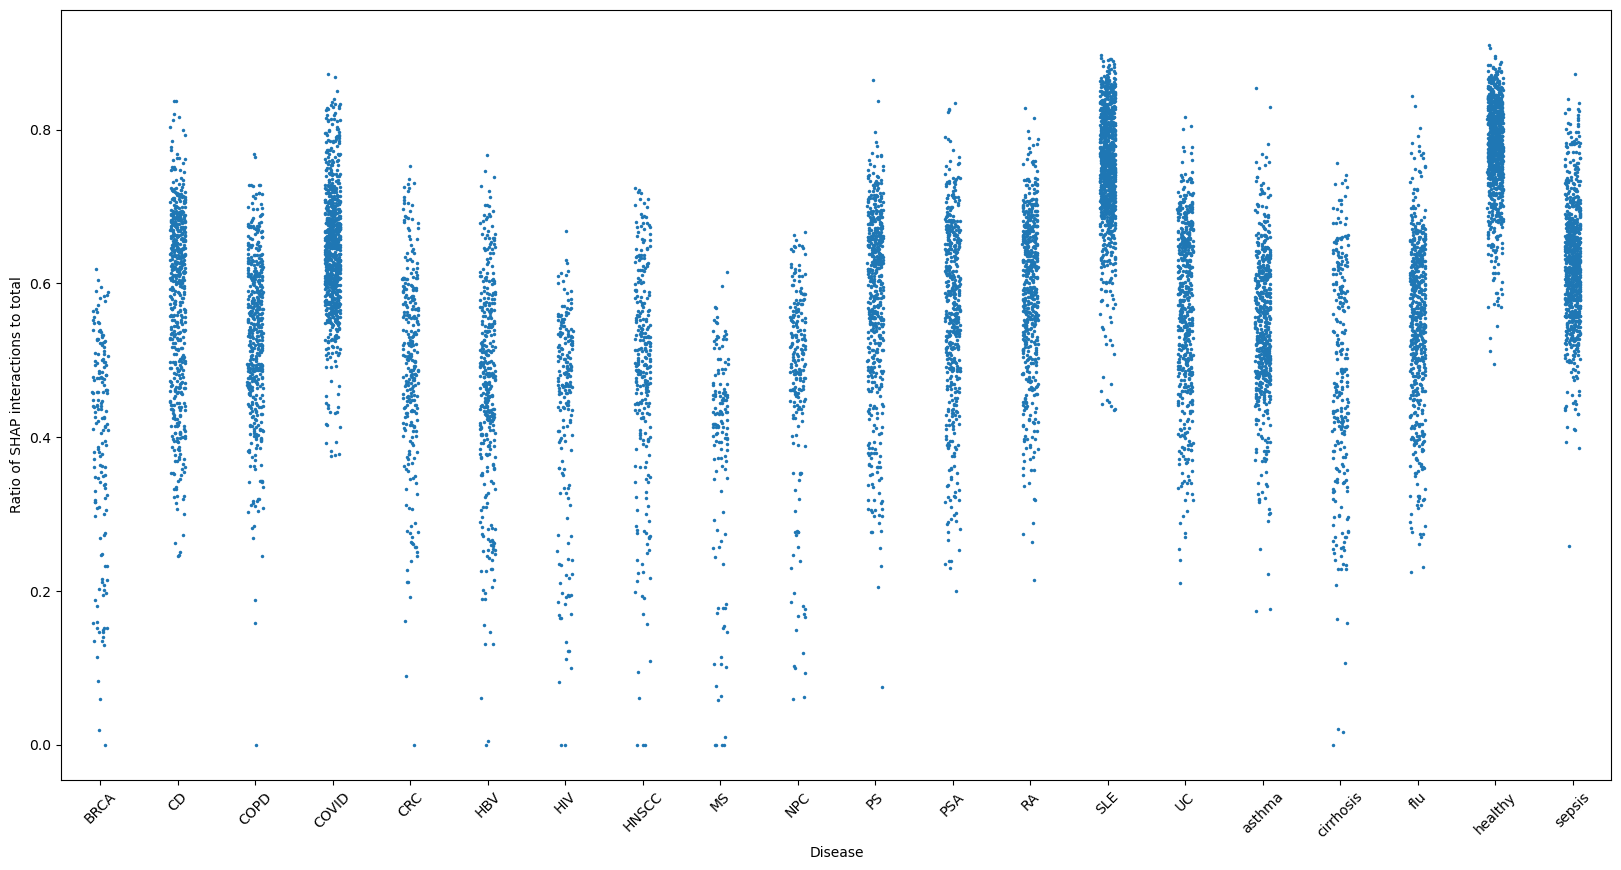

In [14]:
for cell_type in CELL_TYPES:
    print(cell_type)
    tmp = shap_ratio_of_int[cell_type]
    df = pd.DataFrame(tmp)
    df_long = df.melt(var_name='Gene', value_name='SHAP', ignore_index=False)
    df_long.reset_index(inplace=True)
    df_long.rename(columns={'index': 'Disease'}, inplace=True)
    print(df_long.shape)

    plt.figure(figsize=(20, 10))
    g = sns.stripplot(x='Disease', y= 'SHAP',  data=df_long, jitter=True, size=2.5)
    plt.xlabel('Disease')
    plt.ylabel('Ratio of SHAP interactions to total')
    g.set_xticklabels(disease)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.savefig(here(f'03_downstream_analysis/05_SHAP/results/04_shap/shap_statistics_full/jitterplot_{cell_type}_int_SHAP_ratio.png'), bbox_inches='tight')
    plt.show()



In [4]:
shap_per_gene_per_cell_type = {}
shap_int_per_cell_type = {}

for cell_type in CELL_TYPES:

    mean_raw, var_raw, mean_abs, var_abs = load_shap_statistics(cell_type, interactions=True)

    shap_colsum = []
    for j in trange(0, len(disease), leave=False):
        shap_colsum.append(np.sum(mean_abs[:, :, j], axis =0))     
    shap_gene_disease = np.stack(shap_colsum)
    shap_gene_disease = pd.DataFrame(shap_gene_disease.T, index=genes, columns= disease)
    shap_gene_disease = shap_gene_disease.merge(annot.set_index("ensembl_gene_id").loc[:,"symbol"], left_index=True, right_index=True).set_index('symbol')
    shap_per_gene_per_cell_type[cell_type] = shap_gene_disease

    shap_int_per_cell_type[cell_type] = mean_raw


Loading statistics computed on 1040000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 790000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 710000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 210000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 520000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 350000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 10000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 110000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 370000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 20000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

Loading statistics computed on 40000 samples.


  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
disease

Index(['BRCA', 'CD', 'COPD', 'COVID', 'CRC', 'HBV', 'HIV', 'HNSCC', 'MS',
       'NPC', 'PS', 'PSA', 'RA', 'SLE', 'UC', 'asthma', 'cirrhosis', 'flu',
       'healthy', 'sepsis'],
      dtype='object')

In [16]:
# Look at SLE, Mono
tmp = shap_int_per_cell_type['Mono'][:, :, 18]

In [17]:
print(len(tmp[tmp == 0]))
print(len(tmp[tmp != 0]))

408542
465683


(array([4.65663e+05, 1.20000e+01, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([2.66110913e-13, 1.80919540e-03, 3.61839080e-03, 5.42758621e-03,
        7.23678161e-03, 9.04597701e-03, 1.08551724e-02, 1.26643678e-02,
        1.44735632e-02, 1.62827586e-02, 1.80919540e-02]),
 <BarContainer object of 10 artists>)

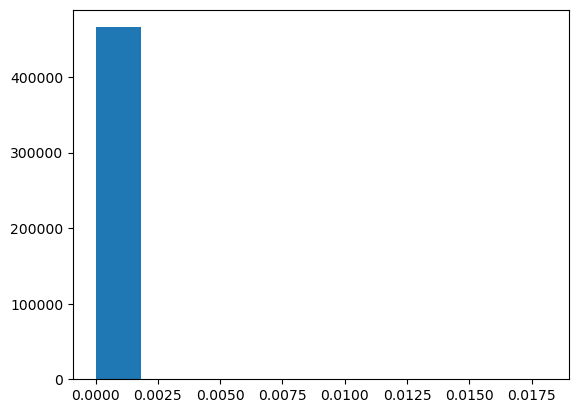

In [18]:
plt.hist(abs(tmp[tmp != 0]))

In [48]:
filtered_shap_per_cell_type ={}

for cell_type1, cell_type2 in zip(shap_per_gene_per_cell_type,shap_int_per_cell_type):
    print(cell_type1)
    # top 50 genes by total shap
    array = shap_per_gene_per_cell_type[cell_type1]
    array = pd.DataFrame(array, index=genes, columns= genes)
    top50 = array.loc[array.sum(axis=1).sort_values(ascending=False).index]
    top50 = top50.loc[(top50!=0).any(axis=1)].head(50) #50x20
    top50 = top50.merge(annot.set_index("ensembl_gene_id").loc[:,"symbol"], left_index=True, right_index=True).set_index('symbol')
    print(top50.shape) # (50, 935)
    # now filter shap tables for top50 genes
    top50_per_cell_type = []
    array_per_cell_type = shap_int_per_cell_type[cell_type2]
    print(cell_type2)
    for j in trange(0, len(disease), leave=False):
        print(array_per_cell_type.shape) # (935, 935, 20)
        array_per_cell_type = array_per_cell_type[:, :, j]
        print(array_per_cell_type.shape) # (935, 935)
        array_per_cell_type = pd.DataFrame(array_per_cell_type, index=genes, columns= genes)
        array_per_cell_type = array_per_cell_type.merge(annot.set_index("ensembl_gene_id").loc[:,"symbol"], left_index=True, right_index=True).set_index('symbol')
        print(array_per_cell_type.shape) # (935, 935)
        array_per_cell_type = array_per_cell_type[array_per_cell_type.index.isin(top50.index)]
        print(array_per_cell_type.shape) # (50, 935)
        top50_per_cell_type.append(array_per_cell_type)



Mono
(50, 935)
Mono


  0%|          | 0/20 [00:00<?, ?it/s]

(935, 935, 20)


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [27]:
top50_interacting = []

for cell_type, array in shap_per_cell_type:
    print(cell_type)
    # Top 50 genes by SHAP value
    top50 = array.loc[array.sum(axis=1).sort_values(ascending=False).index]
    top50 = top50.loc[(top50!=0).any(axis=1)].head(50) #50x20

    shap_int_per_cell_type[cell_type] = shap_int_per_cell_type[~shap_int_per_cell_type.index.isin(top50.index)]

Mono


AttributeError: 'builtin_function_or_method' object has no attribute 'isin'

In [ ]:
df1 = df1[~df1.index.isin(df2.index)]